# Cyber attack dataset Analysis :
This notebook provides a description of the dataset Cyber_attacks (available in [Kaggle](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data))\
It supplies 40 000 synthetic records spread in 25 attributes, each row corresponding to an attack type : Malware, DDoS and Intrusion. These later are used by hackers\pirates to compromise a target's IT security by violating the integrity, confidentiality and availability of sensitive data such as personal, financial, industrial or security information.
- Malware is a  malicious software produced to damage a computer system (e.g. viruses, Trojans, ransomware),
 - DDoS (Distributed Denial of Service) is a set of computer attacks designed to overwhelm a server or network with a large number of requests, overloading it or rendering it unavailable,
  - Intrusion is an unauthorized accesses to a computer system to extract, modify or destroy data via security holes [1].\

These dataset records attacks occurred from January 1, 2020, to October 11, 2023.

The aim of the present notebook is to understand the 3 types of attack and their correlation with the attributes in order to  predict them using a machine learning approach.
To answer this goal, our study is organized in four parts:
1. Exploration of raw data
2. Features engineering
3. Prediction of future attacks
4. Conclusion

*This project describes group work by Victor Coppin, Damien Rondet, Sachiththa Konara Mudiyanselage, Hugo Carton, Nans Long and Naro Kuoch.*




Before to go deeply in details in the overview of our data set, we need to describe the attributes.
These later are described in the list below, from information of wikipedia :
- Timestamp: Attack date and schedule
- Source IP Address: Pirate IP Address
- Destination IP Address: Recipient IP Address IP
- Source Port:Port used by Pirate
- Destination Port: Port used by Host target
- Protocol: Network protocol used in the communication Pirate/Host target
- Packet Length: Packet size (bytes)
- Packet Type: Packet classification
- Traffic Type: Characterization of network traffic
- Payload Data: Data carried in the packet
- Malware Indicators: Signs of  Pirates software
- Anomaly Scores: Numerical score of  a suspicious behavior in comparison to control condition
- Alerts/Warnings: Security message to notify an unusual event
- Attack Type: Identification of a Pirate attack
- Attack Signature: Specific pattern of Pirate attack
- Action Taken: Defense responses
- Severity Level: Impact level of the event
- User Information: User informations
- Device Information: Device informations
- Network Segment: The part of the network touched by the attack
- Geo-location Data: Geographic location of Pirate
- Proxy Information: Proxy server IP address
- Firewall Logs: Recording of firewall activities
- IDS/IPS Alerts: Alerts from intrusion detection system/ intrusion prevention system
- Log Source: identifies the origin of a recorded event


 In our exploration of raw data, we performed an overview of data set without transformations or creations of new variables in order to see the relations between the attributes. For this purpose, we examined the device responses, then the network traffic category, and we finished with a temporal vision of all the survey.

## EDA

In [101]:
import pandas as pd
import config
cyber_security_df = pd.read_csv(config.DATA_DIR / 'raw' / 'cybersecurity_attacks.csv')

- Dataset checkout

In [102]:
cyber_security_df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [103]:
cyber_security_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

- Check missing values

In [104]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Timestamp                     0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Attack Type                   0
Payload Data                  0
Anomaly Scores                0
Severity Level                0
Action Taken                  0
Attack Signature              0
User Information              0
Geo-location Data             0
Network Segment               0
Device Information            0
Log Source                    0
dtype: int64

- Missing values by percentage

In [105]:
cyber_security_df.isnull().sum().sort_values(ascending=False) / len(cyber_security_df) * 100

Alerts/Warnings           50.1675
IDS/IPS Alerts            50.1250
Malware Indicators        50.0000
Firewall Logs             49.9025
Proxy Information         49.6275
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Timestamp                  0.0000
Traffic Type               0.0000
Packet Type                0.0000
Packet Length              0.0000
Protocol                   0.0000
Destination Port           0.0000
Attack Type                0.0000
Payload Data               0.0000
Anomaly Scores             0.0000
Severity Level             0.0000
Action Taken               0.0000
Attack Signature           0.0000
User Information           0.0000
Geo-location Data          0.0000
Network Segment            0.0000
Device Information         0.0000
Log Source                 0.0000
dtype: float64

## Handle Missing Values

In [106]:
cyber_security_df['Alerts/Warnings'].value_counts()

Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64

In [107]:
cyber_security_df['Alerts/Warnings'] = cyber_security_df['Alerts/Warnings'].apply(lambda x: 'No Alert Triggered' if pd.isna(x) else x)

In [108]:
cyber_security_df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64

In [109]:
cyber_security_df['Malware Indicators'] = cyber_security_df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [110]:
cyber_security_df['Firewall Logs'].value_counts()

Firewall Logs
Log Data    20039
Name: count, dtype: int64

In [111]:
cyber_security_df['Firewall Logs'] = cyber_security_df['Firewall Logs'].apply(lambda x: 'No Log Data' if pd.isna(x) else x)

In [112]:
cyber_security_df['IDS/IPS Alerts'].value_counts()

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [113]:
cyber_security_df['IDS/IPS Alerts'] = cyber_security_df['IDS/IPS Alerts'].apply(lambda x: 'No Alert Data' if pd.isna(x) else x)

In [114]:
cyber_security_df['Proxy Information'] = cyber_security_df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [115]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [116]:
cyber_security_df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


## Attack Types

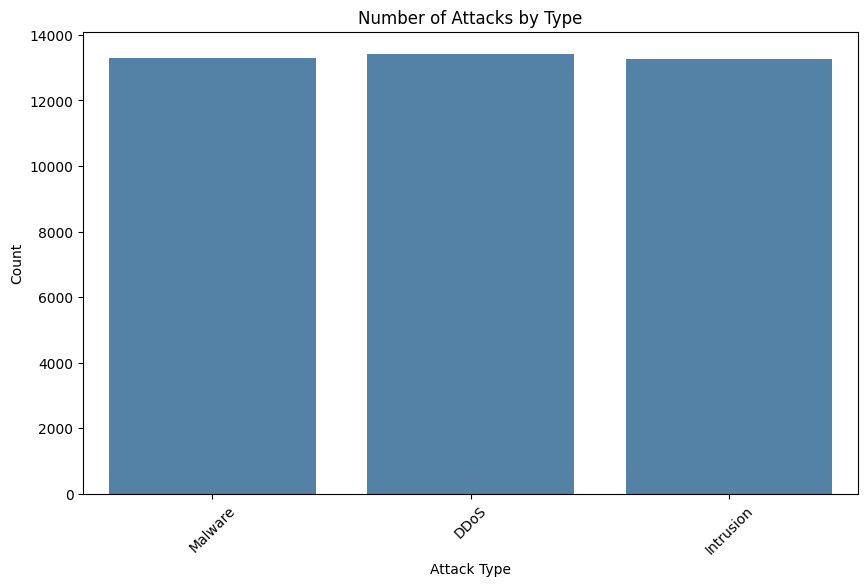

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))
plt.title("Number of Attacks by Type")

# Create a vertical count plot
sns.countplot(data=cyber_security_df, x='Attack Type', color='steelblue')

# Formatting
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.xticks(rotation=45)

# Show plot
plt.show()

The attack types—Malware, DDoS, and Intrusions—are equally distributed. Therefore, the ML project is a balanced classification problem

## Anomaly scores and Packet Length

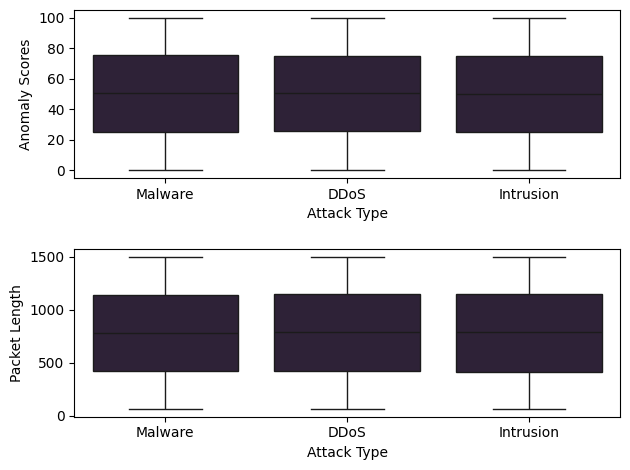

In [118]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1)

# Malware Indicators
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Anomaly Scores", ax=ax1)

# IDS/IPS Alerts
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Packet Length", ax=ax2)



# sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

Both the Anomaly scores and Packet Length don’t vary much regardless of the Attack Type

## Source and Destination Ports

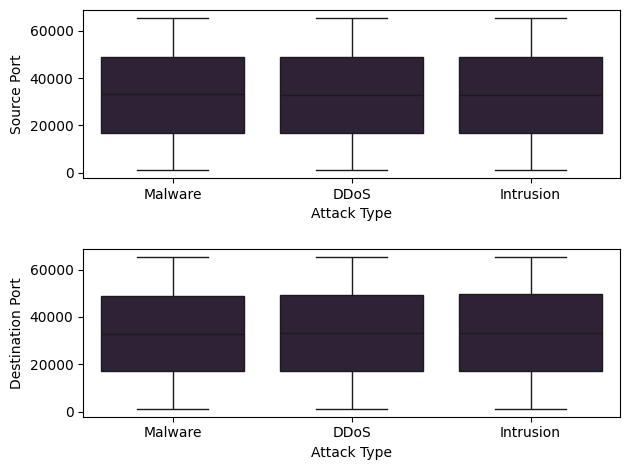

In [119]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1)

# Malware Indicators
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Source Port", ax=ax1)

# IDS/IPS Alerts
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Destination Port", ax=ax2)



# sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

Both the Anomaly scores and Packet Length don’t vary much regardless of the Attack Type

## Protocol, Traffic Type, and Packet Type

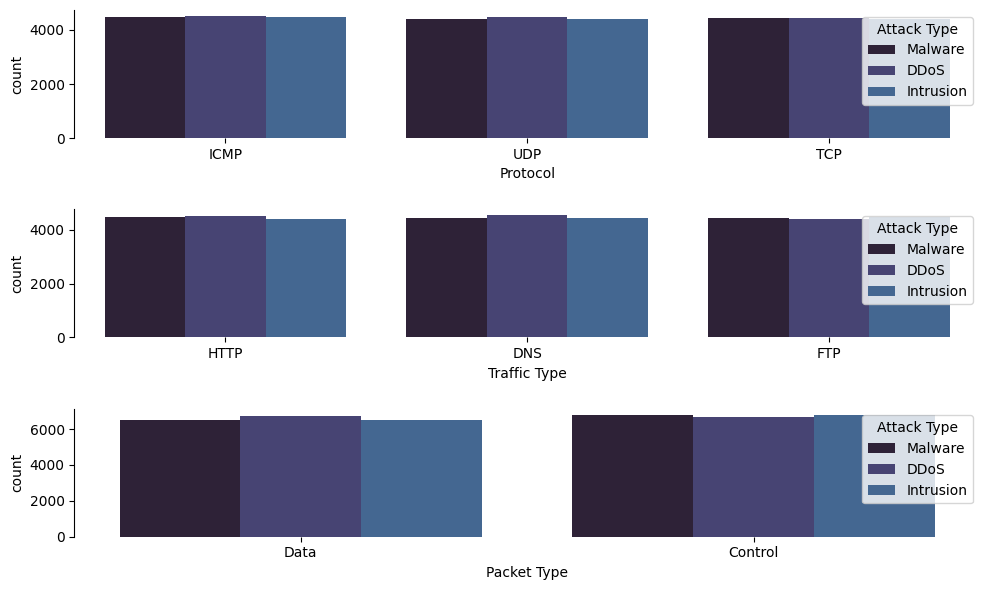

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("mako")

fig,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Protocol
sns.countplot(data=cyber_security_df, x='Protocol', hue='Attack Type',ax=ax1)

# Traffic Type
sns.countplot(data=cyber_security_df, x='Traffic Type', hue='Attack Type',ax=ax2)

# Packet Type
sns.countplot(data=cyber_security_df, x='Packet Type', hue='Attack Type',ax=ax3)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

There was no significant variation of Attack Types within and across different Protocol, Traffic Type, and Packet Type alone


## Malware Indicators, IDS/IPS Alerts, Firewall Logs and, Alerts/Warnings

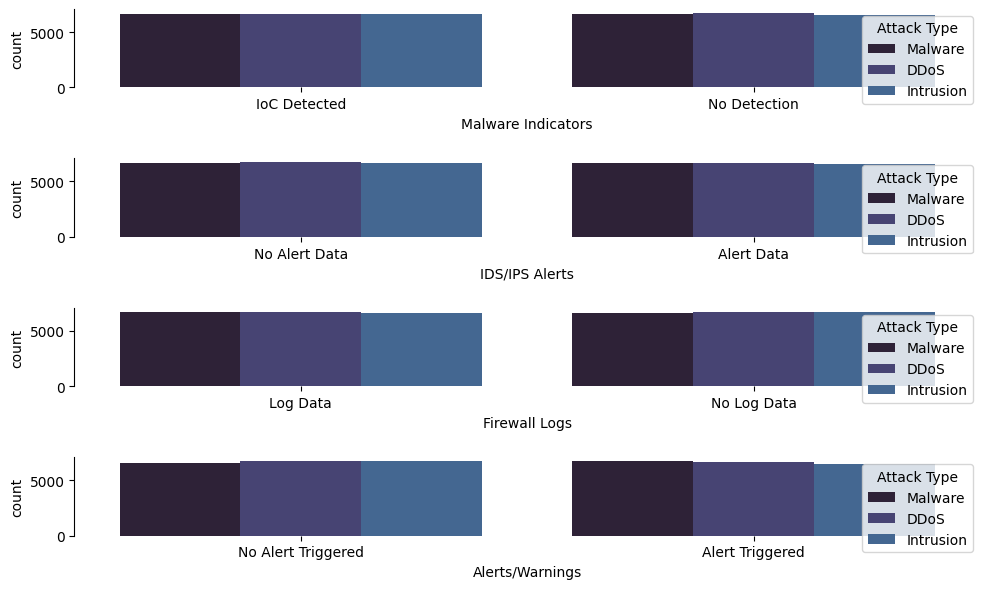

In [121]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Malware Indicators', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='IDS/IPS Alerts', hue='Attack Type',ax=ax2)

# Firewall Logs
sns.countplot(data=cyber_security_df, x='Firewall Logs', hue='Attack Type',ax=ax3)

# Alerts/Warnings
sns.countplot(data=cyber_security_df, x='Alerts/Warnings', hue='Attack Type',ax=ax4)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

- Within each **Malware Indicators** (*IoC Detected*, *No Detection*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Protocol**, the count **Attack Type** classes are evenly distributed. This indicates the for each **Attack type** the system is responding in a similar way. For each Attack Type way the security system is reacting the same way.

- Within each **IDS/IPS Alerts** (*Alerts*, *No Alerts*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **IDS/IPS Alerts**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **IDS/IPS Alerts**. The type of attack doesn't change how  many alerts the system produces.

- Within each **Firewall Logs** (*Log Data*, *No Log Data*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Firewall Logs**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Firewall Logs**. The type of attack doesent make noticeble diffence inthe how the firewall logdata

## Attack Signature, Action Taken, Network Segment and, Severity Level

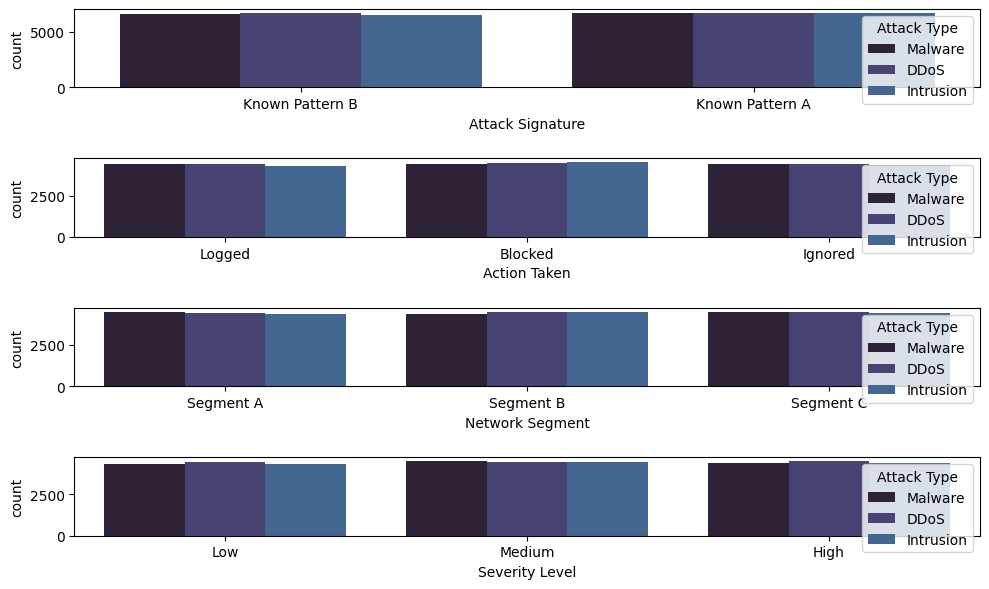

In [122]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)


sns.countplot(data=cyber_security_df, x='Attack Signature', hue='Attack Type',ax=ax1)


sns.countplot(data=cyber_security_df, x='Action Taken', hue='Attack Type',ax=ax2)


sns.countplot(data=cyber_security_df, x='Network Segment', hue='Attack Type',ax=ax3)

sns.countplot(data=cyber_security_df, x='Severity Level', hue='Attack Type',ax=ax4)

plt.tight_layout(h_pad=2)
plt.show()

There was no significant variation of Attack Types within and across Attack Signature, Action Taken, Network Segment, and Severity Level 

## Log Source

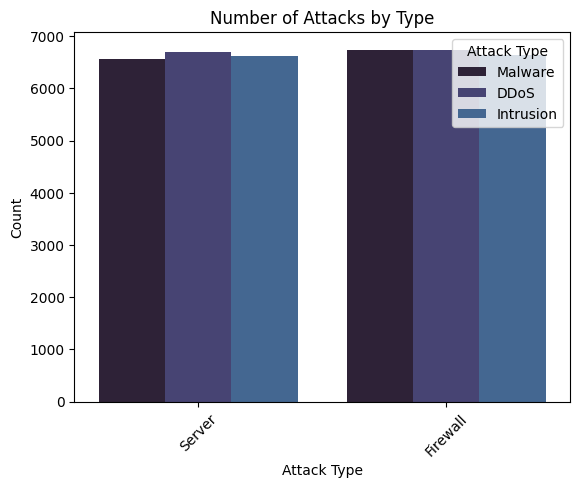

In [123]:
plt.title("Number of Attacks by Type")

# Create a vertical count plot
sns.countplot(data=cyber_security_df, x='Log Source', hue='Attack Type')

# Formatting
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.xticks(rotation=45)

# Show plot
plt.show()

There was no significant variation of Attack Types within and across different Log Sources

## IP CLasses

In [124]:
import ipaddress

def get_ip_class(ip_address):
    first_octet = int(ip_address.split('.')[0])


    if 1 <= first_octet <= 126:
        return "Class A"
    elif 128 <= first_octet <= 191:
        return "Class B"
    elif 192 <= first_octet <= 223:
        return "Class C"
    elif 224 <= first_octet <= 239:
        return "Class D"
    elif 240 <= first_octet <= 255:
        return "Class E"
    else:
        return "Invalid IP Address"
    



In [125]:
cyber_security_df['Source IP Class'] = cyber_security_df['Source IP Address'].apply(get_ip_class)
cyber_security_df['Destination IP Class'] = cyber_security_df['Destination IP Address'].apply(get_ip_class)

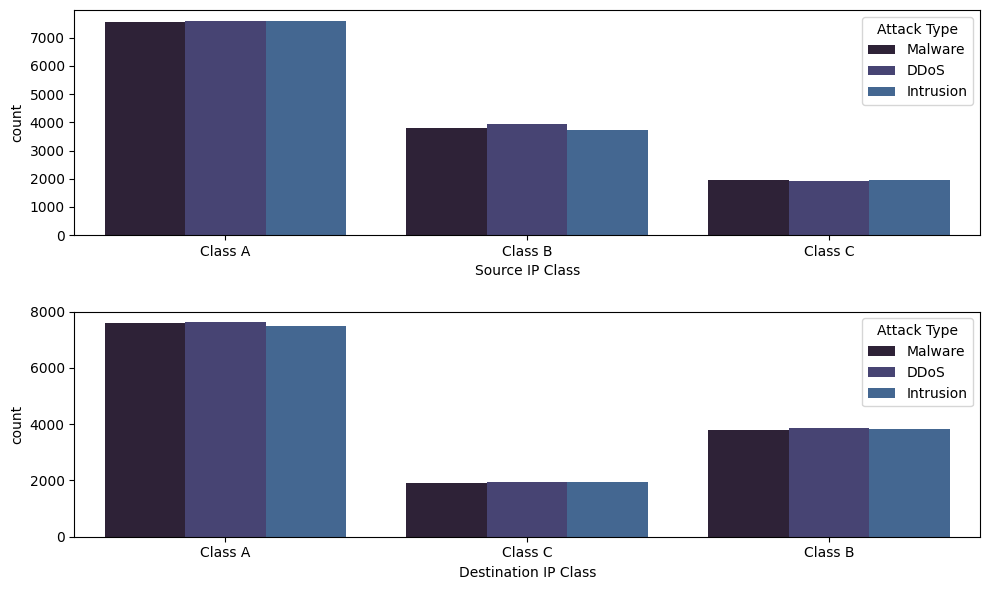

In [126]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source IP Class', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination IP Class', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

IP addresses are ID information, as they don’t  provide much intrinsic value on their own. However, the Destination IP and Source IP were categorized into IP classes with the expectation that certain IP classes might be more susceptible to specific attack types. However, although the count of attack types varied across different IP classes, there was no significant variation in attack type within a specific IP class for both Destination and Source IPs

## IP Visibility

In [127]:
import ipaddress
def is_private_ip(ip_address):
    return  "Private" if ipaddress.ip_address(ip_address).is_private else "Public"

In [128]:
cyber_security_df['Source IP Visibility'] = cyber_security_df['Source IP Address'].apply(is_private_ip)
cyber_security_df['Destination IP Visibility'] = cyber_security_df['Destination IP Address'].apply(is_private_ip)

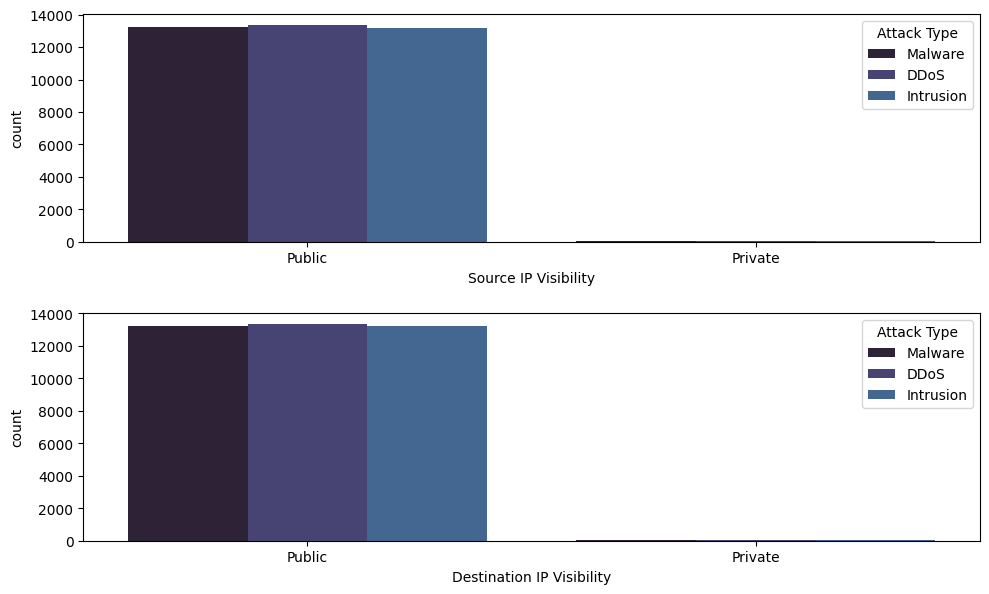

In [129]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source IP Visibility', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination IP Visibility', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

The Count of Private IPs is very low compared to public IPs which is as expected

In [130]:
cyber_security_df = cyber_security_df.drop(columns=['Source IP Visibility', 'Destination IP Visibility']) 

## OS, Device, and Browser

In [131]:
# Iterate over DataFrame rows
from uaparser import UAParser as parse_ua

for index, row in cyber_security_df.iterrows():
    parsed_ua = parsed_ua = parse_ua(row['Device Information']) 

    os_name = parsed_ua.os.get('name') or 'Unknown'# Major version

    browser_name = parsed_ua.browser.get('name') or 'Unknown'

    device_type = parsed_ua.device.get('type') or  'PC'

    # Assign extracted values to new columns
    cyber_security_df.at[index, 'OS'] = os_name
    cyber_security_df.at[index, 'Browser'] = browser_name
    cyber_security_df.at[index, 'Device'] = device_type

In [132]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Source IP Class           0
Destination IP Class      0
OS                        0
Browser                   0
Device                    0
dtype: int64

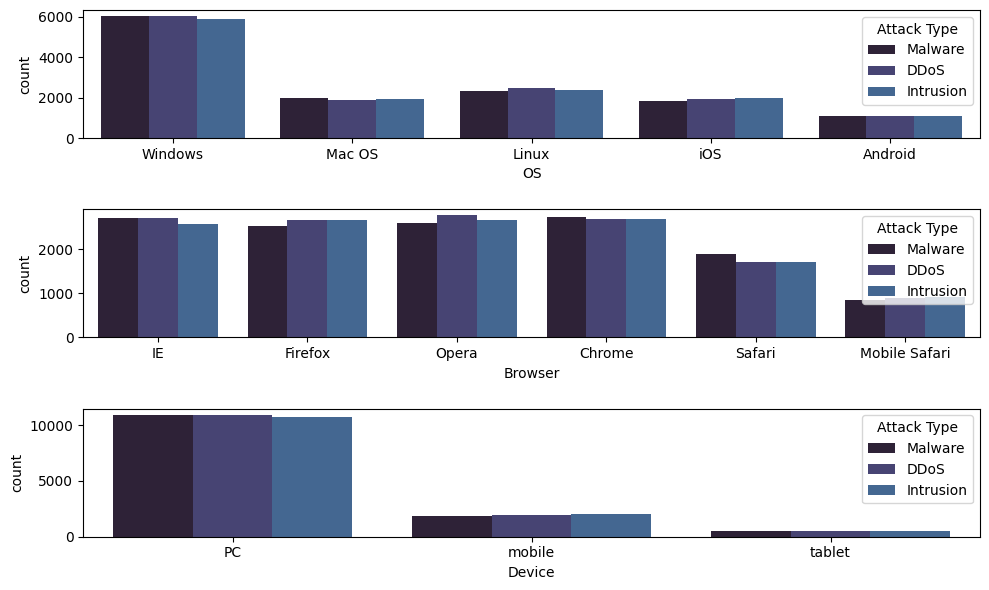

In [133]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# OS
sns.countplot(data=cyber_security_df, x='OS', hue='Attack Type',ax=ax1)

# Browser
sns.countplot(data=cyber_security_df, x='Browser', hue='Attack Type',ax=ax2)

# Device
sns.countplot(data=cyber_security_df, x='Device', hue='Attack Type',ax=ax3)


plt.tight_layout(h_pad=2)
plt.show()

Device Information was decomposed into OS, Browser, and Device categories with the expectation that certain types of operating systems, browsers, and devices might be more vulnerable to specific Attack types. However, looking at the diagram (Figure 11), although the count of attack types varies across different devices, browsers, and operating systems, there was no significant variation in attack type within a particular browser, device, or OS, showing absence of correlations among these features in our dataset

## Port Categories

In [134]:
def categorize_port(port: int):
    if 0 <= port <= 1023:
        return 'SystemPorts'
    elif 1024 <= port <= 49151:
        return 'UserPorts'
    elif 49152 <= port <= 65535:
        return 'Dynamic'
    else:
        return 'Unknow'

In [135]:
cyber_security_df['Source Port Category'] = cyber_security_df['Source Port'].apply(categorize_port)
cyber_security_df['Destination Port Category'] = cyber_security_df['Destination Port'].apply(categorize_port)

In [136]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
OS                           0
Browser                      0
Device                       0
Source Port Category         0
Destination Port Category    0
dtype: i

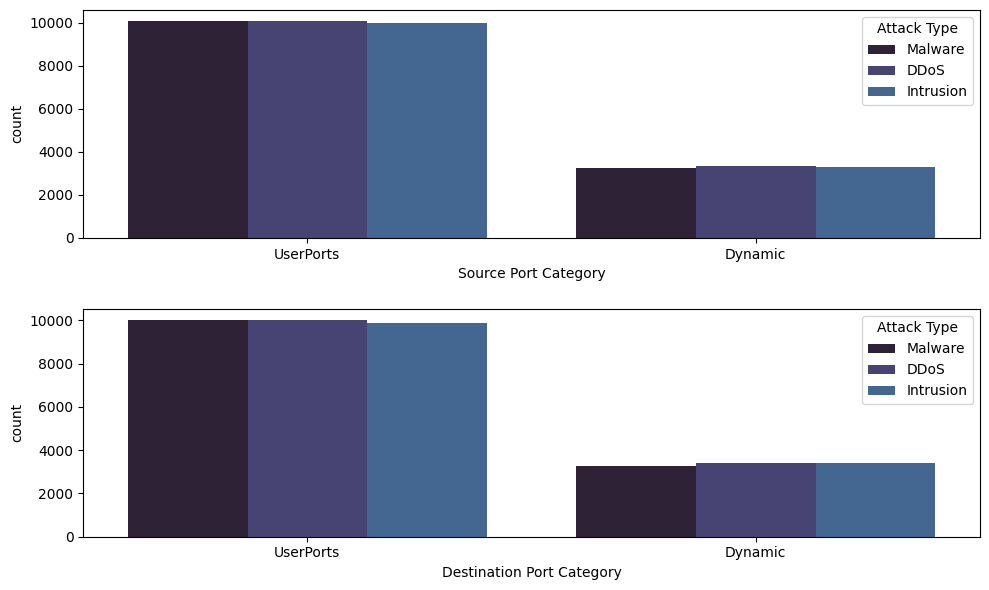

In [137]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source Port Category', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination Port Category', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

## Datetime Features

In [138]:
cyber_security_df['Timestamp'] = pd.to_datetime(cyber_security_df['Timestamp'])
    
cyber_security_df['Year'] = cyber_security_df['Timestamp'].dt.year
cyber_security_df['Month'] = cyber_security_df['Timestamp'].dt.month
cyber_security_df['Hour'] = cyber_security_df['Timestamp'].dt.hour
cyber_security_df['DayOfWeek'] = cyber_security_df['Timestamp'].dt.dayofweek

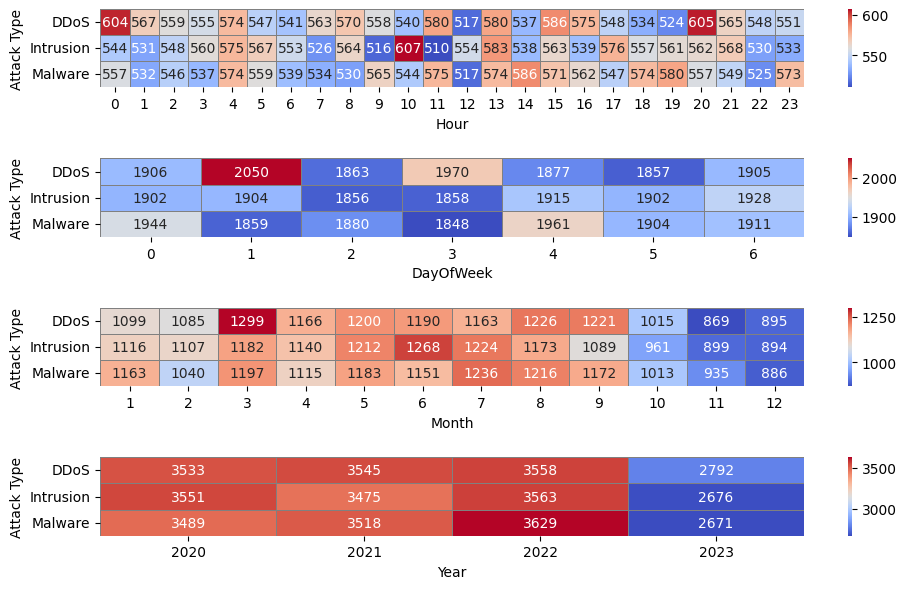

In [139]:
# Pivot the data to get a heatmap-friendly format
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

time_axes_pairs = [('Hour', ax1), ('DayOfWeek', ax2), ('Month', ax3), ('Year', ax4)]

for t, ax in time_axes_pairs:
    groupby = cyber_security_df.groupby([t, 'Attack Type']).size().reset_index(name='Count')
    pivot_table = groupby.pivot(index='Attack Type', columns=t, values='Count').fillna(0)
    sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, linecolor="gray", annot=True, fmt=".0f", ax=ax)


plt.tight_layout(h_pad=2)

plt.show()




The timestamp was decomposed into Hour, DayOfWeek, Month, and Year, expecting to see seasonal changes in Attack Types. However, there is no such variation, and these results correlated with these in the notebook 

## Packet Length Categories

In [140]:
cyber_security_df["Packet Length Category"] = pd.cut(cyber_security_df['Packet Length'], bins = [0, 64, 512, 1023, 1499, float('inf')], labels = ['Small', 'Medium', 'Large', 'Very Large', 'Huge'])

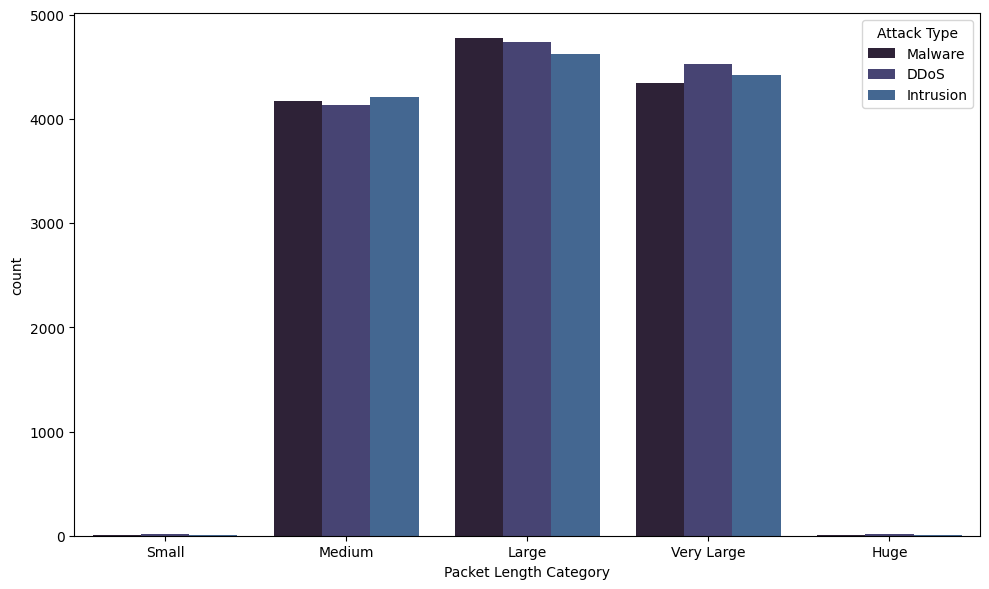

In [141]:
sns.set_palette("mako")

fig,(ax1) = plt.subplots(1, 1, figsize=(10, 6), sharex=False)

sns.countplot(data=cyber_security_df, x='Packet Length Category', hue='Attack Type',ax=ax1)

plt.tight_layout(h_pad=2)

plt.show()

The packet length values were grouped into five categories to understand their distribution and find patterns  

- Small (0-64 bytes) 

- Medium (65-512 bytes) 

- Large (513-1023 bytes) 

- Very Large (1024-1499 bytes) 

- Huge (over 1499 bytes) 

Then categorization divides packet sizes into ranges, with the meaning of packet size depending on the protocol and whether the packet is control or data. Control packets usually have smaller data sizes, while data packets tend to be larger predictions. The aim was to find variations in packet size that could be linked to different attack types, but none were found

## Geo Location Data

In [142]:
cyber_security_df["State"] = cyber_security_df['Geo-location Data'].apply(lambda x: x.split(',')[-1])

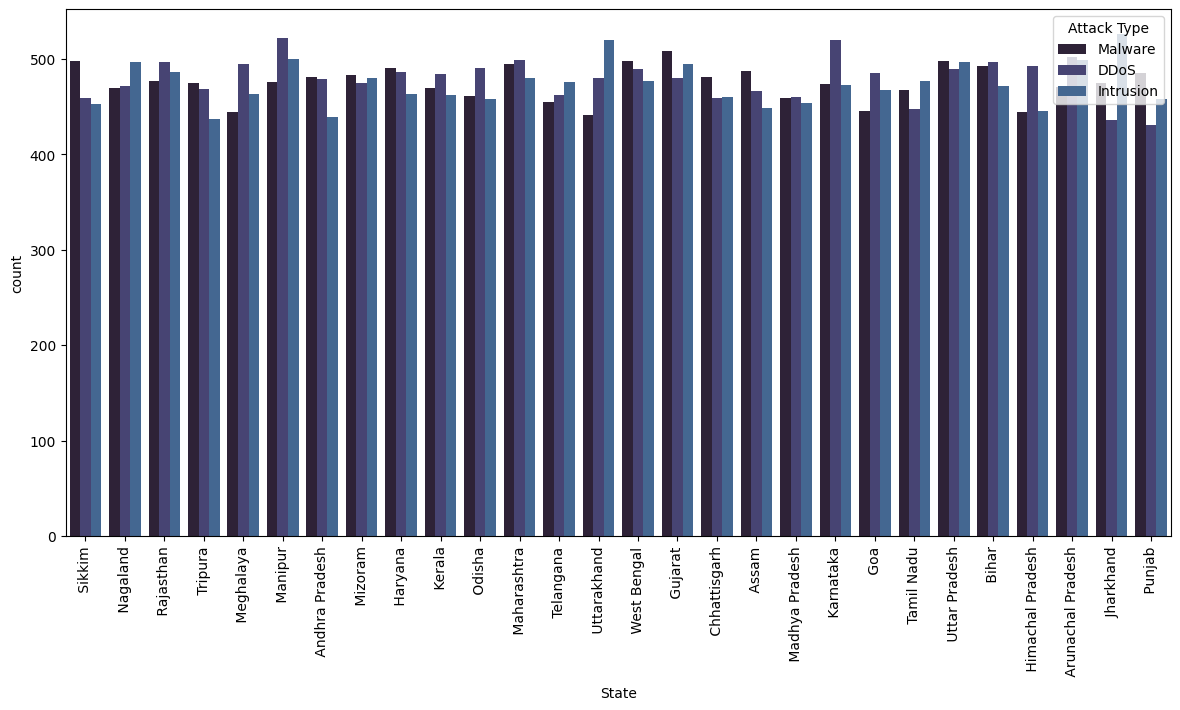

In [143]:
sns.set_palette("mako")

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 6), sharex=False)

sns.countplot(data=cyber_security_df, x='State', hue='Attack Type',ax=ax1)

plt.tight_layout(h_pad=2)

plt.xticks(rotation=90)

plt.show()

By analyzing the geolocation data, we can infer that there are 28 distinct regions, corresponding to the states of India. The count of each attack type remains consistent across all regions, with no significant variation observed

In [144]:
cyber_security_df = cyber_security_df.drop(columns=['State'])

## Anomaly Scores vs Packet Length

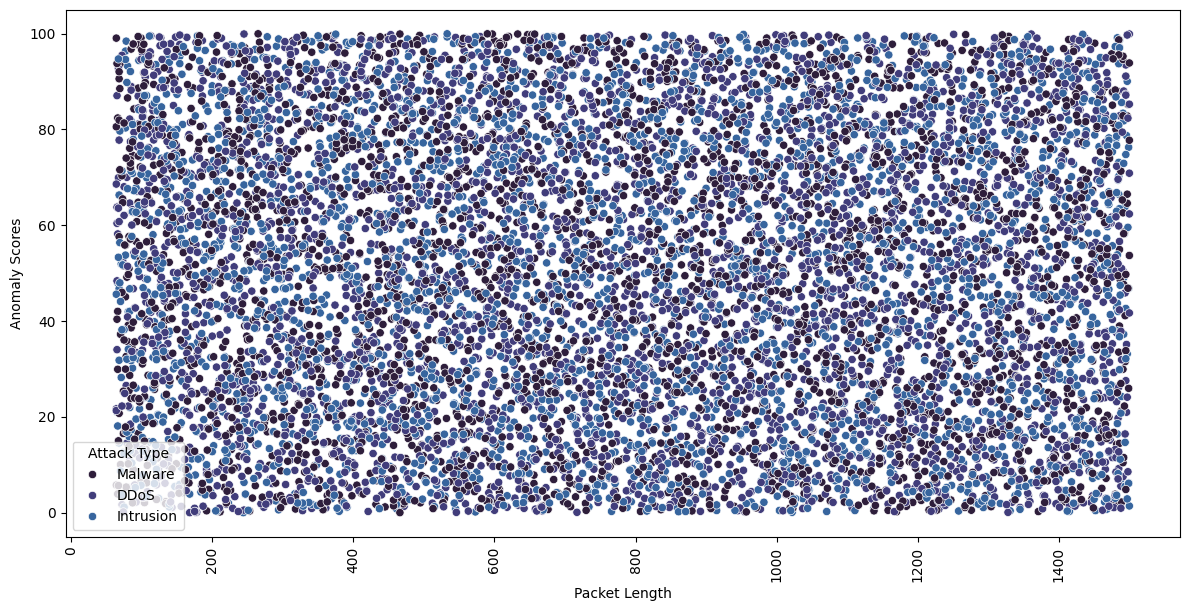

In [145]:
sns.set_palette("mako")

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 6), sharex=False)

sns.scatterplot(x="Packet Length", y="Anomaly Scores", hue="Attack Type", data=cyber_security_df.sample(10000))

plt.tight_layout(h_pad=2)

plt.xticks(rotation=90)

plt.show()

Does not reveal any clear pattern or clustering. The data points appear to be randomly distributed, indicating no strong relationship between these variables in identifying specific attack types

In [146]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
OS                           0
Browser                      0
Device                       0
Source Port Category         0
Destination Port Category    0
Year    

# Model Tranning

### Data preparation for trainning

In [147]:
df_proccesed = cyber_security_df.copy()

In [148]:
attack_type_dict = {
    "DDoS": 0,      
    "Malware": 1,  
    "Intrusion": 2    
    
}

df_proccesed['Attack Type'] = df_proccesed['Attack Type'].apply(lambda x: attack_type_dict.get(x))

In [149]:
severity_level_dict = {
    "Low": 0,      
    "Medium": 1,  
    "High": 2    
}

df_proccesed['Severity Level'] = df_proccesed['Severity Level'].apply(lambda x: severity_level_dict.get(x))

In [150]:
df_proccesed["Is Proxy Used"] = df_proccesed['Proxy Information'].apply(lambda x: "No" if pd.isna(x) else "Yes")

In [151]:
from sklearn.preprocessing import StandardScaler 
columns_to_scale = ['Anomaly Scores', 'Packet Length']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling only to selected columns
df_proccesed[columns_to_scale] = scaler.fit_transform(df_proccesed[columns_to_scale])

In [152]:
cols_to_drop = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Device Information', 'Proxy Information', "User Information", "Geo-location Data", "Payload Data"]
df_proccesed = df_proccesed.drop(columns=cols_to_drop, axis=1)


In [153]:
df_proccesed.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Source IP Class', 'Destination IP Class', 'OS', 'Browser', 'Device',
       'Source Port Category', 'Destination Port Category', 'Year', 'Month',
       'Hour', 'DayOfWeek', 'Packet Length Category', 'Is Proxy Used'],
      dtype='object')

### Helper functions

In [154]:
from sklearn.metrics  import classification_report
from sklearn.model_selection import train_test_split


def evaluate_model(df, model):
    target = 'Attack Type'
    df = df.copy()

    y = df[target]
    x = df.drop(columns=[target], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [155]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

def list_important_features(model, df):
    target = 'Attack Type'
    df = df.copy()

    y = df[target]
    x = df.drop(columns=[target], axis=1)

    selector =  RFECV(
        estimator=model,
        step=1,  # Remove 5 features at a time
        cv=5,
        scoring="accuracy",
        verbose=True
    )

    x_train, _, y_train, _ = train_test_split(x, y, test_size=0.2, random_state=42)

    selector.fit(x_train, y_train)
    for i, col in zip(range(x_train.shape[1]), x_train.columns):
        print(f"{col} selected={selector.support_[i]} rank={selector.ranking_[i]}")


In [156]:
def plot_feature_importance(df):
    df['feature'] = df['feature'].apply(lambda x: x.split('_')[0])
    df = df.groupby('feature').sum()

    df = df.sort_values(by='importance', ascending=False)

    sns.set_palette("mako")

    fig,(ax1) = plt.subplots(1, 1, figsize=(5, 5), sharex=False)

    sns.barplot(x='importance', y='feature', data=df)
    ax1.set_title("Feature vs Importance")

    plt.tight_layout(h_pad=2)

    plt.show()

In [157]:
# Radom Seed
RANDOM_SEED = 42

## Random Forest

In [187]:
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df.head().T

,0,1,2,3,4
Packet Length,-0.669295,0.943535,-1.142808,-0.952922,1.635778
Anomaly Scores,-0.743191,0.048054,1.292975,-1.189588,-1.718818
Attack Type,1.000000,1.000000,0.000000,1.000000,0.000000
Severity Level,0.000000,0.000000,0.000000,1.000000,0.000000
Year,2023.000000,2020.000000,2022.000000,2023.000000,2023.000000
Month,5.000000,8.000000,11.000000,7.000000,7.000000
Hour,6.000000,7.000000,8.000000,10.000000,13.000000
DayOfWeek,1.000000,2.000000,6.000000,6.000000,6.000000
Protocol_TCP,0.000000,0.000000,0.000000,0.000000,1.000000
Protocol_UDP,0.000000,0.000000,1.000000,1.000000,0.000000


### Model Performance with all/combination of features

In [188]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(random_state=RANDOM_SEED)
evaluate_model(df, rf_clf)


              precision    recall  f1-score   support

           0       0.34      0.39      0.36      2636
           1       0.34      0.35      0.34      2643
           2       0.34      0.29      0.31      2721

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



## REFCV

In [189]:
# Takes a lot of time to compute so its commented
list_important_features(rf_clf, df)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

### Model performance with features from REFCV + Approximatley 10 features

In [190]:
selected_features = ['Anomaly Scores', 'Packet Length', 'Hour', 'Month', 'DayOfWeek', 'Year', 'Protocol', 'Traffic Type', 'Alerts/Warnings', 'Attack Signature', 'Severity Level', 'Malware Indicators', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Source IP Class', 'Destination IP Class', 'Source Port Category', 'Destination Port Category']
target = ['Attack Type']
df_important = df_proccesed[target + selected_features]
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
evaluate_model(df_important, rf_clf)


              precision    recall  f1-score   support

           0       0.35      0.39      0.37      2636
           1       0.33      0.33      0.33      2643
           2       0.35      0.31      0.32      2721

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



### Feature Importance

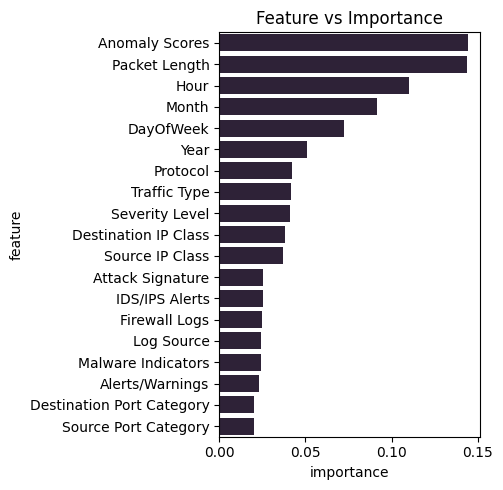

In [191]:

df = pd.DataFrame({
    'feature': rf_clf.feature_names_in_,
    'importance': rf_clf.feature_importances_
})
plot_feature_importance(df)



### SMOTE

In [192]:
from sklearn.model_selection import train_test_split

selected_features = ['Anomaly Scores', 'Packet Length', 'Hour', 'Month', 'DayOfWeek', 'Year', 'Severity Level', 'Malware Indicators', 'Firewall Logs', 'IDS/IPS Alerts', 'Traffic Type', 'Attack Signature']
target = 'Attack Type'

df = pd.get_dummies(df_proccesed[[target] + selected_features], drop_first=True, dtype=int)

y = df[target]
x = df.drop(columns=['Attack Type'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

In [193]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics  import classification_report
from sklearn.ensemble import RandomForestClassifier


sampling_strat = {0: 50000, 1: 50000, 2: 50000}
smote = SMOTE(sampling_strategy = sampling_strat, random_state = RANDOM_SEED)
x_smote, y_smote = smote.fit_resample(x_train, y_train.values)

rf_cls = RandomForestClassifier(random_state=RANDOM_SEED)
rf_cls.fit(x_smote, y_smote)
y_pred = rf_cls.predict(x_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.37      0.35      2636
           1       0.33      0.32      0.32      2643
           2       0.33      0.31      0.32      2721

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



### Clustering

In [210]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=RANDOM_SEED)
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df['Cluster'] = kmeans.fit_predict(df)

In [211]:
from sklearn.ensemble import RandomForestClassifier

selected_features = ['Anomaly Scores', 'Packet Length', 'Hour', 'Month', 'DayOfWeek', 'Year', 'Severity Level', 'Malware Indicators', 'Firewall Logs', 'IDS/IPS Alerts', 'Traffic Type', 'Attack Signature']
target = 'Attack Type'

df_important = df_proccesed[[target] + selected_features]
df_important = df_important.assign(Cluster=df['Cluster'])
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
rf_cls = RandomForestClassifier(random_state=RANDOM_SEED)
evaluate_model(df_important, rf_clf)

              precision    recall  f1-score   support

           0       0.34      0.37      0.35      2636
           1       0.32      0.32      0.32      2643
           2       0.34      0.31      0.33      2721

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



## Logistic Regression

In [194]:
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df.head().T

,0,1,2,3,4
Packet Length,-0.669295,0.943535,-1.142808,-0.952922,1.635778
Anomaly Scores,-0.743191,0.048054,1.292975,-1.189588,-1.718818
Attack Type,1.000000,1.000000,0.000000,1.000000,0.000000
Severity Level,0.000000,0.000000,0.000000,1.000000,0.000000
Year,2023.000000,2020.000000,2022.000000,2023.000000,2023.000000
Month,5.000000,8.000000,11.000000,7.000000,7.000000
Hour,6.000000,7.000000,8.000000,10.000000,13.000000
DayOfWeek,1.000000,2.000000,6.000000,6.000000,6.000000
Protocol_TCP,0.000000,0.000000,0.000000,0.000000,1.000000
Protocol_UDP,0.000000,0.000000,1.000000,1.000000,0.000000


### Model Performance with all/combination of features

In [195]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=RANDOM_SEED, max_iter=500, solver='newton-cg')
evaluate_model(df, lr_clf)

              precision    recall  f1-score   support

           0       0.35      0.41      0.38      2636
           1       0.34      0.36      0.35      2643
           2       0.34      0.26      0.29      2721

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



### RFECV

In [196]:
#Takes a lot of time to compute so its commented
list_important_features(lr_clf, df)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

### Model performance with features from REFCV

In [170]:
selected_features = ["Alerts/Warnings", "Source IP Class", "OS", "Device", "Packet Length Category", "Browser", "Packet Type"]           # Rank 1
target = ['Attack Type']
df_important = df_proccesed[target + selected_features]
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
evaluate_model(df_important, lr_clf)

              precision    recall  f1-score   support

           0       0.34      0.47      0.39      2636
           1       0.35      0.35      0.35      2643
           2       0.36      0.22      0.27      2721

    accuracy                           0.34      8000
   macro avg       0.35      0.35      0.34      8000
weighted avg       0.35      0.34      0.34      8000



### Feature Importance

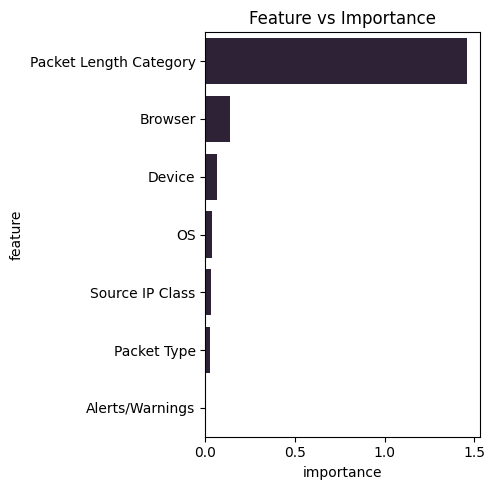

In [171]:
import numpy as np
df = pd.DataFrame({
    'feature': lr_clf.feature_names_in_,
    'importance': np.abs(lr_clf.coef_[0])
})

plot_feature_importance(df)


### SMOTE

In [215]:
from sklearn.model_selection import train_test_split

selected_features = ["Alerts/Warnings", "Source IP Class", "OS", "Device", "Packet Length Category", "Browser", "Packet Type"]
target = 'Attack Type'

df = pd.get_dummies(df_proccesed[[target] + selected_features], drop_first=True, dtype=int)

y = df[target]
x = df.drop(columns=['Attack Type'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)


In [218]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics  import classification_report
from sklearn.linear_model import LogisticRegression


sampling_strat = {0: 50000, 1: 50000, 2: 50000}
smote = SMOTE(sampling_strategy = sampling_strat, random_state = RANDOM_SEED)
x_smote, y_smote = smote.fit_resample(x_train, y_train.values)

lg_cls = LogisticRegression(random_state=42, max_iter=500, solver='newton-cg')
lg_cls.fit(x_smote, y_smote)
y_pred = lg_cls.predict(x_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.32      0.33      2636
           1       0.35      0.38      0.36      2643
           2       0.35      0.34      0.35      2721

    accuracy                           0.35      8000
   macro avg       0.35      0.35      0.35      8000
weighted avg       0.35      0.35      0.35      8000



### Clustering

In [174]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=RANDOM_SEED)
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df['Cluster'] = kmeans.fit_predict(df)

In [175]:
from sklearn.linear_model import LogisticRegression

selected_features = ["Alerts/Warnings", "Source IP Class", "OS", "Device", "Packet Length Category", "Browser", "Packet Type"]
target = 'Attack Type'

df_important = df_proccesed[[target] + selected_features]
df_important = df_important.assign(Cluster=df['Cluster'])
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
lg_cls = LogisticRegression(random_state=42, max_iter=500, solver='newton-cg')
evaluate_model(df_important, lg_cls)

              precision    recall  f1-score   support

           0       0.34      0.47      0.39      2636
           1       0.35      0.36      0.36      2643
           2       0.36      0.22      0.27      2721

    accuracy                           0.35      8000
   macro avg       0.35      0.35      0.34      8000
weighted avg       0.35      0.35      0.34      8000



# XGBRFClassifier

In [205]:
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df.head().T




,0,1,2,3,4
Packet Length,-0.669295,0.943535,-1.142808,-0.952922,1.635778
Anomaly Scores,-0.743191,0.048054,1.292975,-1.189588,-1.718818
Attack Type,1.000000,1.000000,0.000000,1.000000,0.000000
Severity Level,0.000000,0.000000,0.000000,1.000000,0.000000
Year,2023.000000,2020.000000,2022.000000,2023.000000,2023.000000
Month,5.000000,8.000000,11.000000,7.000000,7.000000
Hour,6.000000,7.000000,8.000000,10.000000,13.000000
DayOfWeek,1.000000,2.000000,6.000000,6.000000,6.000000
Protocol_TCP,0.000000,0.000000,0.000000,0.000000,1.000000
Protocol_UDP,0.000000,0.000000,1.000000,1.000000,0.000000


### Model Performance with all/combination of features

In [177]:
from xgboost import XGBRFClassifier

xg_clf = XGBRFClassifier(random_state=RANDOM_SEED)
evaluate_model(df, xg_clf)

              precision    recall  f1-score   support

           0       0.33      0.44      0.38      2636
           1       0.33      0.34      0.34      2643
           2       0.34      0.23      0.28      2721

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



### RFECV

In [206]:
# Commented because it takes a lot of time
list_important_features(xg_clf, df)

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 fe

### Model performance with features from REFCV

In [179]:
selected_features = ['Packet Length', 'Anomaly Scores', 'Year', 'Month', 'Hour', 'DayOfWeek', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature',
                      'Action Taken', 'Network Segment', 'IDS/IPS Alerts', 'Log Source', 'Source IP Class', 'Destination IP Class', 'OS', 'Source Port Category', 'Device']
target = ['Attack Type']
df_important = df_proccesed[target + selected_features]
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
evaluate_model(df_important, xg_clf)

              precision    recall  f1-score   support

           0       0.34      0.43      0.38      2636
           1       0.34      0.34      0.34      2643
           2       0.34      0.25      0.29      2721

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



### Feature Importance

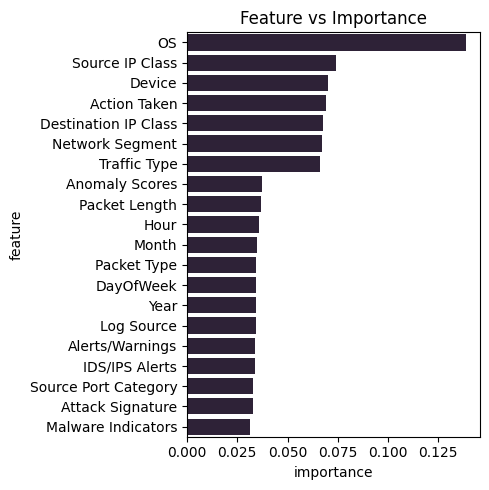

In [180]:
df = pd.DataFrame({
    'feature': xg_clf.feature_names_in_,
    'importance': xg_clf.feature_importances_
})

plot_feature_importance(df)

### SMOTE

In [181]:
from sklearn.model_selection import train_test_split

selected_features = ['Packet Length', 'Anomaly Scores', 'Year', 'Month', 'Hour', 'DayOfWeek', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature',
                      'Action Taken', 'Network Segment', 'IDS/IPS Alerts', 'Log Source', 'Source IP Class', 'Destination IP Class', 'OS', 'Source Port Category', 'Device']
target = 'Attack Type'

df = pd.get_dummies(df_proccesed[[target] + selected_features], drop_first=True, dtype=int)

y = df[target]
x = df.drop(columns=['Attack Type'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

In [182]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics  import classification_report
from xgboost import XGBRFClassifier




sampling_strat = {0: 50000, 1: 50000, 2: 50000}
smote = SMOTE(sampling_strategy = sampling_strat, random_state = RANDOM_SEED)
x_smote, y_smote = smote.fit_resample(x_train, y_train.values)

xg_clf = XGBRFClassifier(random_state=RANDOM_SEED)
xg_clf.fit(x_smote, y_smote)
y_pred = xg_clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.38      0.36      2636
           1       0.34      0.31      0.32      2643
           2       0.35      0.34      0.34      2721

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



### Clustering

In [183]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=RANDOM_SEED)
df = pd.get_dummies(df_proccesed, drop_first=True, dtype=int)
df['Cluster'] = kmeans.fit_predict(df)

In [184]:
from xgboost import XGBRFClassifier

selected_features = ['Packet Length', 'Anomaly Scores', 'Year', 'Month', 'Hour', 'DayOfWeek', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Signature',
                      'Action Taken', 'Network Segment', 'IDS/IPS Alerts', 'Log Source', 'Source IP Class', 'Destination IP Class', 'OS', 'Source Port Category', 'Device']
target = 'Attack Type'

df_important = df_proccesed[[target] + selected_features]
df_important = df_important.assign(Cluster=df['Cluster'])
df_important = pd.get_dummies(df_important, drop_first=True, dtype=int)
xg_clf = XGBRFClassifier(random_state=RANDOM_SEED)
evaluate_model(df_important, xg_clf)

              precision    recall  f1-score   support

           0       0.34      0.42      0.37      2636
           1       0.33      0.34      0.34      2643
           2       0.35      0.25      0.29      2721

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000

